### Udacity /  Data Analyst Nanodegree 08'2016
### P2: Investigate a Dataset

### 1. ASSIGNMENT
Choose one of Udacity's curated datasets and investigate it using NumPy and Pandas. Go through the entire data analysis process, starting by posing a question and finishing by sharing your findings.

### 2. TOOLS
Import all required libraries and modules - numpy, pandas, matplotlib.pyplot and seaborn - to be able to produce calculations and plots in ipython notebook to analyze the titanic data.

In [28]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib import gridspec
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### 3. DATA SET LOADING AND GENERAL REVIEW

Titanic Data set - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

In [2]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**VARIABLE DESCRIPTIONS:**<br/>
survival - Survival (0 = No; 1 = Yes)<br/>
pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br/>
name - Name<br/>
sex - Sex<br/>
age - Age<br/>
sibsp - Number of Siblings/Spouses Aboard<br/>
parch - Number of Parents/Children Aboard<br/>
ticket - Ticket Number<br/>
fare - Passenger Fare<br/>
cabin - Cabin<br/>
embarked - Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

**MISSING DATA:**<br/>
To verify if there are any missing data, I am generating summary statistics of the data set. Result shows the count of 'Age' column is less than other numerical column counts, it has NaN values. 

In [3]:
titanic_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

/Users/daivasatas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To investigate the data set in detail, I generate statistics after droping entries that have missing/NaN data. The resulted data set has lost too many entries to proceed with the analysis.

In [4]:
titanic_df_dropna = titanic_df.dropna()
titanic_df_dropna.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


I am countig non-empty fields in every text column of data set. The result shows that  'Cabin', 'Embarked' columns have empty fields.

In [5]:
titanic_df[['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket']].count()

Name        891
Sex         891
Cabin       204
Embarked    889
Ticket      891
dtype: int64

The result shows that  'Cabin', 'Embarked' columns have empty fields. I decided not to use these particular data in my investigation, as well as 'Name','Ticket' and 'Age' columns.

In [6]:
titanic_df = titanic_df.drop(['Cabin', 'Name', 'Age', 'Embarked', 'Ticket'], axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB


To detect if there are non-unifom, mis-matched formats or any values with typographical errors needed correcting, I am generating unique values for columns 'Survived', 'Sex' and 'Pclass'. The result is as expected.

In [7]:
unique_survived = np.unique(titanic_df[['Survived']].values)
unique_sex = np.unique(titanic_df[['Sex']].values)
unique_pclass = np.unique(titanic_df[['Pclass']].values)

print unique_survived
print unique_sex
print unique_pclass

[0 1]
['female' 'male']
[1 2 3]


### 4. HYPOTHESIS

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. (https://www.kaggle.com/c/titanic)<br/>
My goal is to explore the survival rates of men, and women overall and based on their traveling class or how the rates correlated with passenger location on the ship. In particular, I wanted to compare survival rates of the first class males and third class females. The hypothesis is that the gender does impact the chances of survival.  <br/>

H0: Gender has no impact on survivability<br/>
H1: Gender does impact the chances of survivability<br/>

α level: 0.05 / 5%

### 5. ANALYZING DATA

### "Titanic" total passenger proportions 

In [8]:
gender = titanic_df['Sex']
pclass = titanic_df['Pclass']

In [9]:
gender.value_counts()

male      577
female    314
Name: Sex, dtype: int64

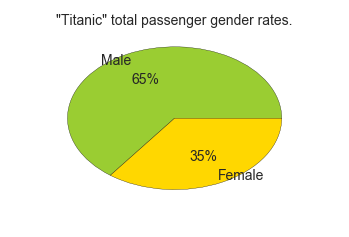

In [10]:
gender.value_counts().plot(
    kind='pie',
    colors=['yellowgreen', 'gold'], 
    autopct='%1.0f%%',
    labels=['Male', 'Female'],
    fontsize=14,
    radius=0.8,
    labeldistance=0.9
)
plt.title('"Titanic" total passenger gender rates.', y =0.9, fontsize=14)
plt.ylabel('')

In [11]:
pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

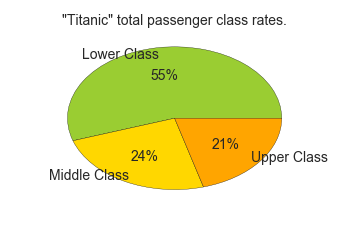

In [12]:
pclass.value_counts().plot(
    kind='pie',
    colors=['yellowgreen', 'gold', 'orange'], 
    autopct='%1.0f%%',
    labels=['Lower Class', 'Middle Class', 'Upper Class'],
    fontsize=14,
    radius=0.8,
    labeldistance=0.9
)
plt.title('"Titanic" total passenger class rates.', y =0.9, fontsize=14)
plt.ylabel('')

### "Titanic" total proportions of survivors

In [13]:
survived = titanic_df['Survived']

In [14]:
survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

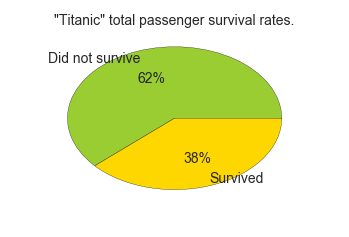

In [15]:
survived.value_counts().plot(
    kind='pie',
    colors=['yellowgreen', 'gold'], 
    autopct='%1.0f%%',
    labels=['Did not survive', 'Survived'],
    fontsize=14,
    radius=0.8,
    labeldistance=0.9
)
plt.title('"Titanic" total passenger survival rates.', y =0.9, fontsize=14)
plt.ylabel('')

### "Titanic" survival rates based on gender

In [16]:
print pd.crosstab(gender, survived)
print 
print pd.crosstab(gender, survived, normalize='index')

Survived    0    1
Sex               
female     81  233
male      468  109

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


In [17]:
## Grouping data by gender (male, female) and class (1,2,3).
grouped_gen_class = titanic_df.groupby(['Sex','Pclass'])

In [18]:
# Data for female passengers
data_sum_f =  grouped_gen_class.sum()['Survived']['female']    # number of female survivors
data_count_f = grouped_gen_class.count()['Survived']['female'] # number of female passengers
class_f = data_sum_f.keys().values                             # array of classes of female passengers 
rate_f = (data_sum_f / data_count_f) * 100                     # proportion of female passenger survivors by pclass

total_f = gender.value_counts()['female']

total_survived_f = pd.crosstab(gender,survived)[1]['female']
rate_total_f = int(total_survived_f / float(total_f ) * 100)   # proportion of all female passenger survivors

In [19]:
# Data for male pasangers
data_sum_m =  grouped_gen_class.sum()['Survived']['male']    # number of male survivors
data_count_m = grouped_gen_class.count()['Survived']['male'] # number of male passengers
class_m = data_sum_m.keys().values                           # array of classes of female passengers
rate_m = (data_sum_m / data_count_m) * 100                   # proportion of male passanger survivors by pclass

total_m = gender.value_counts()['male']
total_survived_m = pd.crosstab(gender,survived)[1]['male']
rate_total_m = int(total_survived_m / float(total_m) * 100)  # proportion of all male passenger survivors

In [20]:
rate = [rate_total_f,rate_total_m]
survival_rate_total = pd.Series(
    rate,
    index = ['female', 'male']
)

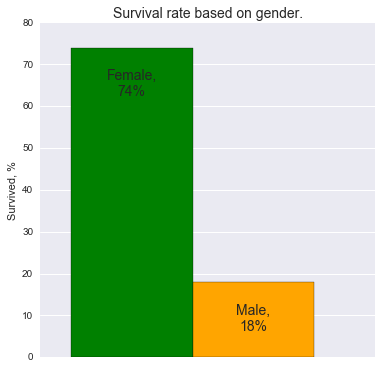

In [21]:
plot_2 = survival_rate_total.plot(
    kind='bar',
    color=['green', 'orange'],
    width=1,  
    position=1.5,
        figsize=(6,6)
)

plot_2.axes.get_xaxis().set_visible(False)
plt.ylabel('Survived, %')
plt.title('Survival rate based on gender.',fontsize=14)
categories_total = ['Female', 'Male']
for i,rect in enumerate(plot_2.patches):
    height = rect.get_height()
    plot_2.text(rect.get_x() + rect.get_width()/2.,height-5,'{},\n{}%'.format(categories_total[i],\
    int(height)),ha='center', va='top',fontsize=14)  


### "Titanic" total passangers based on class and gender

In [22]:
print pd.crosstab(gender,pclass)
print
print pd.crosstab(gender,pclass,normalize='index')

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347

Pclass         1         2         3
Sex                                 
female  0.299363  0.242038  0.458599
male    0.211438  0.187175  0.601386


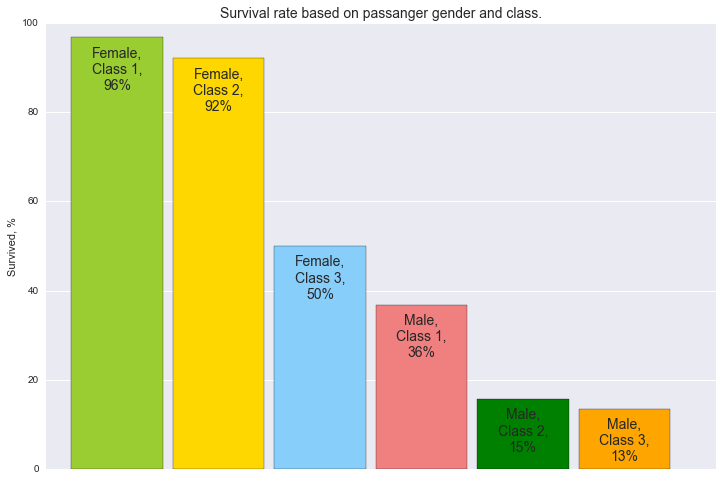

In [23]:
rate_genders = pd.concat([rate_f,rate_m])
levels = np.concatenate((class_f, class_m))

survival_rate = pd.Series(
    rate_genders,
    index = levels
)

plot_1 = survival_rate.plot(
    kind='bar',
    color=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'green', 'orange'],
    width=0.9,  
    position=1.5,
    figsize=(12,8)
)

plot_1.axes.get_xaxis().set_visible(False) 
plt.ylabel('Survived, %')
plt.title('Survival rate based on passanger gender and class.',fontsize=14)

categories = grouped_gen_class.count()['Survived'].keys()
for i,rect in enumerate(plot_1.patches):
    height = rect.get_height()
    plot_1.text(rect.get_x() + rect.get_width()/2.,\
            height-2,\
            '{},\nClass {},\n{}%'.format(categories[i][0].title(), categories[i][1], int(height)),\
            ha='center', va='top',fontsize=14) 

### P-Value

I am using Fisher’s exact test to compare data in order to determine if there is any association between them.

In [24]:
import scipy.stats as stats

In [25]:
print gender.value_counts()['male'], gender.value_counts()['female']

577 314


In [26]:
print total_survived_m, total_survived_f

109 233


In [27]:
oddsratio, pvalue = stats.fisher_exact([gender.value_counts(),[total_survived_m,total_survived_f]])
print pvalue

2.4456146362e-25


### 6. CONCLUSION

As the P-Value is less than significance level of 5%, the probability of that the gender will impact the chances of survival is high. Based on the data sample, the overall survival rate for men was 18%, for women it was 74%. Therefore we can reject the null hypothesis. Also, the survival rate for men traveling first class was just 2/3 of the survival rate for women traveling third class. I believe, it was indeed women rescued first.


#### RECOURSES:
http://www.ultimatetitanic.com/facts-statistics/#.V60PRpMrKHp

https://www.kaggle.com/c/titanic

http://www.historyonthenet.com/titanic/passengers.htm

http://matplotlib.org/1.2.1/examples/pylab_examples/barchart_demo.html

http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots

https://blogtanic.wordpress.com/tag/titanic-survival-rates/

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.unique.html

http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.fisher_exact.html
